# World Happiness Report K-Means Clustering


## Dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data?select=2019.csv

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Loading Dataset

In [189]:
happy_df = pd.read_csv('Predictive Analytics/2019.csv')

#### Assessing Dataset

In [191]:
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [193]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [195]:
happy_df.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [197]:
happy_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [219]:
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Healthy Life Expectancy vs Perception of Corruption

##### Exploring Data

Text(0, 0.5, 'Perceptions of corruption')

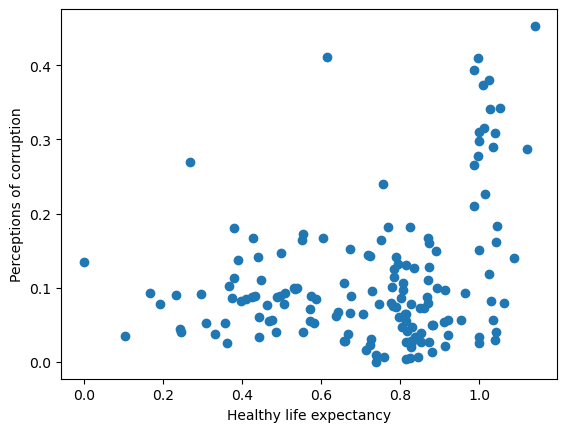

In [19]:
plt.scatter(happy_df["Healthy life expectancy"], 
            happy_df["Perceptions of corruption"])

plt.xlabel("Healthy life expectancy")
plt.ylabel("Perceptions of corruption")

##### Choosing Relevant Columns

In [201]:
relevant_cols = ["Score","Healthy life expectancy", "Perceptions of corruption"]

df1 = happy_df[relevant_cols]
df1

,Score,Healthy life expectancy,Perceptions of corruption
0,7.769,0.986,0.393
1,7.600,0.996,0.410
2,7.554,1.028,0.341
3,7.494,1.026,0.118
4,7.488,0.999,0.298
...,...,...,...
151,3.334,0.614,0.411
152,3.231,0.499,0.147
153,3.203,0.361,0.025
154,3.083,0.105,0.035


#### Data Transformation

- Use the StandardScaler.
- fit() method to calculate the mean and standard deviation of the features.
- transform() method to scale the data.

In [203]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)
scaled_data[0:10]

array([[2.12871112, 1.08042247, 2.99675712],
       [1.97639663, 1.12185663, 3.17715844],
       [1.93493825, 1.25444597, 2.4449413 ],
       [1.8808621 , 1.24615914, 0.07850042],
       [1.87545448, 1.13428688, 1.98863208],
       [1.86824433, 1.35388797, 2.46616499],
       [1.74477045, 1.17572105, 2.78452027],
       [1.71232476, 1.24615914, 2.85880316],
       [1.68618796, 1.30002355, 2.0947505 ],
       [1.65734734, 1.20472497, 1.22457942]])

In [205]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

#### Determine the best number of cluster

In [207]:
def find_best_clusters(df1, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df1)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [376]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

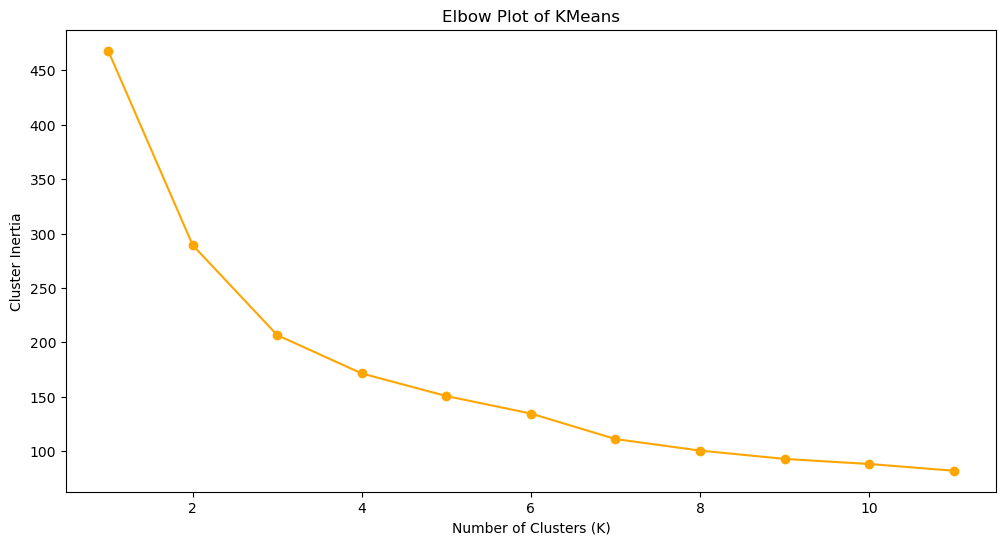

In [378]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

#### Create the final KMeans model

In [380]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [382]:
df1["clusters"] = kmeans_model.labels_

df1.head()

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_3520\4264278145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans_model.labels_


,Score,Healthy life expectancy,Perceptions of corruption,clusters
0,7.769,0.986,0.393,0
1,7.600,0.996,0.410,0
2,7.554,1.028,0.341,0
3,7.494,1.026,0.118,0
4,7.488,0.999,0.298,0


#### Visualize the Clusters

Text(0, 0.5, 'Perceptions of corruption')

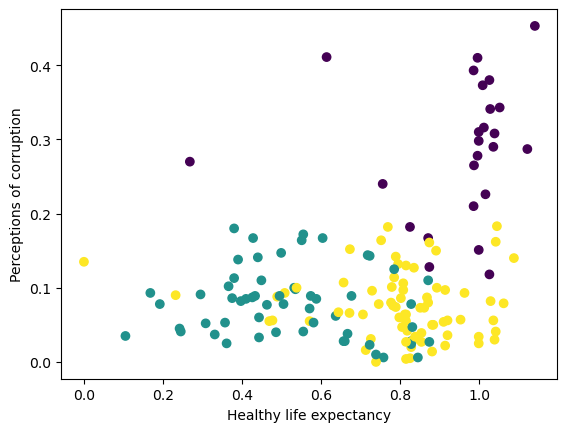

In [388]:
plt.scatter(df1["Healthy life expectancy"], 
            df1["Perceptions of corruption"], 
            c = df1["clusters"])

plt.xlabel("Healthy life expectancy")
plt.ylabel("Perceptions of corruption")

## Healthy Life Expectancy vs Generosity

#### Exploring Data

Text(0, 0.5, 'Generosity')

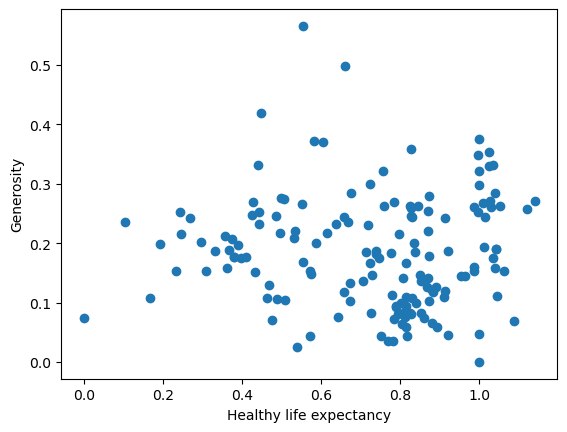

In [127]:
plt.scatter(happy_df["Healthy life expectancy"], 
            happy_df["Generosity"])

plt.xlabel("Healthy life expectancy")
plt.ylabel("Generosity")

#### Choosing Relevant Columns

In [151]:
relevant_cols2 = ["Score","Healthy life expectancy", "Generosity"]

df2 = happy_df[relevant_cols2]
df2

,Score,Healthy life expectancy,Generosity
0,7.769,0.986,0.153
1,7.600,0.996,0.252
2,7.554,1.028,0.271
3,7.494,1.026,0.354
4,7.488,0.999,0.322
...,...,...,...
151,3.334,0.614,0.217
152,3.231,0.499,0.276
153,3.203,0.361,0.158
154,3.083,0.105,0.235


#### Data Transformation

- Use the StandardScaler.
- fit() method to calculate the mean and standard deviation of the features.
- transform() method to scale the data.

In [153]:
scaler = StandardScaler()
scaler.fit(df2)
scaled_data = scaler.transform(df2)
scaled_data[0:10]

array([[ 2.12871112,  1.08042247, -0.33540398],
       [ 1.97639663,  1.12185663,  0.70726491],
       [ 1.93493825,  1.25444597,  0.90737308],
       [ 1.8808621 ,  1.24615914,  1.78152982],
       [ 1.87545448,  1.13428688,  1.44450554],
       [ 1.86824433,  1.35388797,  0.82311701],
       [ 1.74477045,  1.17572105,  0.86524504],
       [ 1.71232476,  1.24615914,  1.52876161],
       [ 1.68618796,  1.30002355,  1.0548212 ],
       [ 1.65734734,  1.20472497,  0.62300884]])

#### Determine the best number of cluster

In [155]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [157]:
def find_best_clusters(df2, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df2)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [159]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

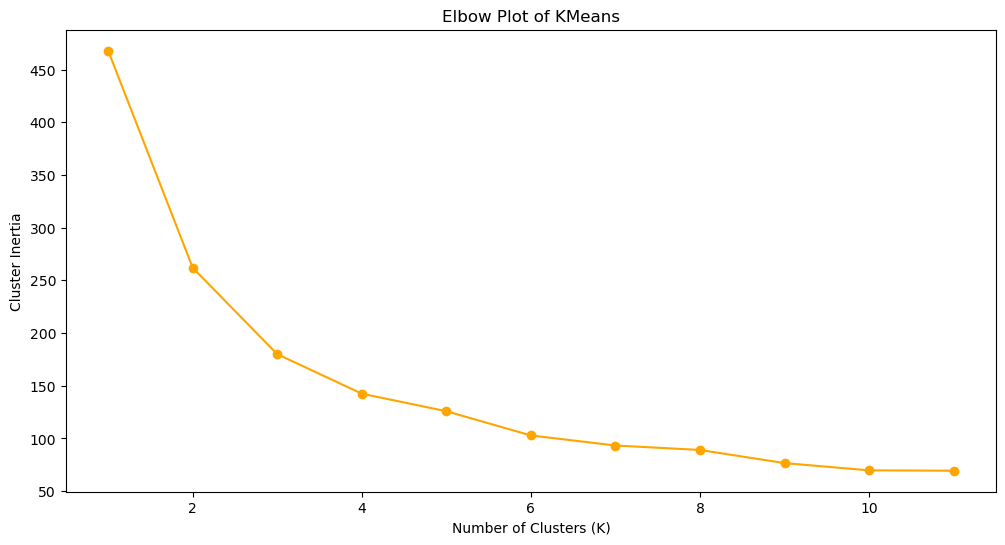

In [161]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

### Create the final KMeans model

In [163]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [165]:
df2["clusters"] = kmeans_model.labels_

df2.head()

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_3520\3754979326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["clusters"] = kmeans_model.labels_


,Score,Healthy life expectancy,Generosity,clusters
0,7.769,0.986,0.153,0
1,7.600,0.996,0.252,0
2,7.554,1.028,0.271,0
3,7.494,1.026,0.354,0
4,7.488,0.999,0.322,0


#### Visualize the clusters

Text(0, 0.5, 'Generosity')

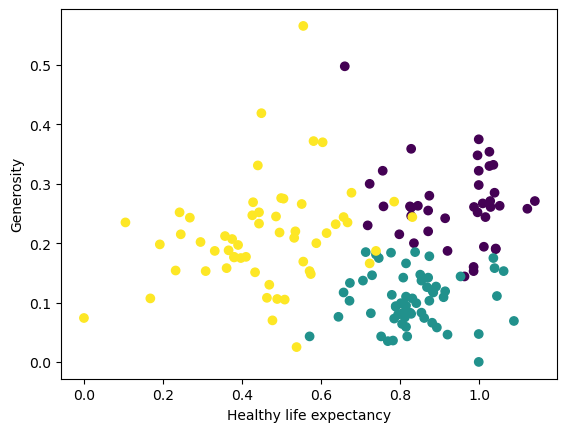

In [167]:
plt.scatter(df2["Healthy life expectancy"], 
            df2["Generosity"], 
            c = df2["clusters"])

plt.xlabel("Healthy life expectancy")
plt.ylabel("Generosity")

## Healthy life expectancy vs Freedom to make life choices

#### Exploring Data

Text(0, 0.5, 'Freedom to make life choices')

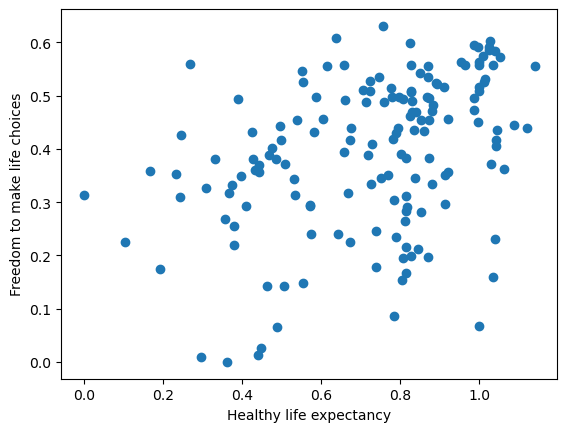

In [67]:
plt.scatter(happy_df["Healthy life expectancy"], 
            happy_df["Freedom to make life choices"])

plt.xlabel("Healthy life expectancy")
plt.ylabel("Freedom to make life choices")

#### Choosing Relevant Columns

In [169]:
relevant_cols3 = ["Score", "Healthy life expectancy","Freedom to make life choices"]

df3 = happy_df[relevant_cols3]
df3

,Score,Healthy life expectancy,Freedom to make life choices
0,7.769,0.986,0.596
1,7.600,0.996,0.592
2,7.554,1.028,0.603
3,7.494,1.026,0.591
4,7.488,0.999,0.557
...,...,...,...
151,3.334,0.614,0.555
152,3.231,0.499,0.417
153,3.203,0.361,0.000
154,3.083,0.105,0.225


#### Data Transformation

- Use the StandardScaler.
- fit() method to calculate the mean and standard deviation of the features.
- transform() method to scale the data.

In [171]:
scaler = StandardScaler()
scaler.fit(df3)
scaled_data = scaler.transform(df3)
scaled_data[0:10]

array([[2.12871112, 1.08042247, 1.4242823 ],
       [1.97639663, 1.12185663, 1.39627687],
       [1.93493825, 1.25444597, 1.47329179],
       [1.8808621 , 1.24615914, 1.38927551],
       [1.87545448, 1.13428688, 1.15122941],
       [1.86824433, 1.35388797, 1.25624975],
       [1.74477045, 1.17572105, 1.27025246],
       [1.71232476, 1.24615914, 1.34726738],
       [1.68618796, 1.30002355, 1.34026602],
       [1.65734734, 1.20472497, 0.9761955 ]])

In [173]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

#### Determine the best number of cluster

In [175]:
def find_best_clusters(df3, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df3)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [177]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

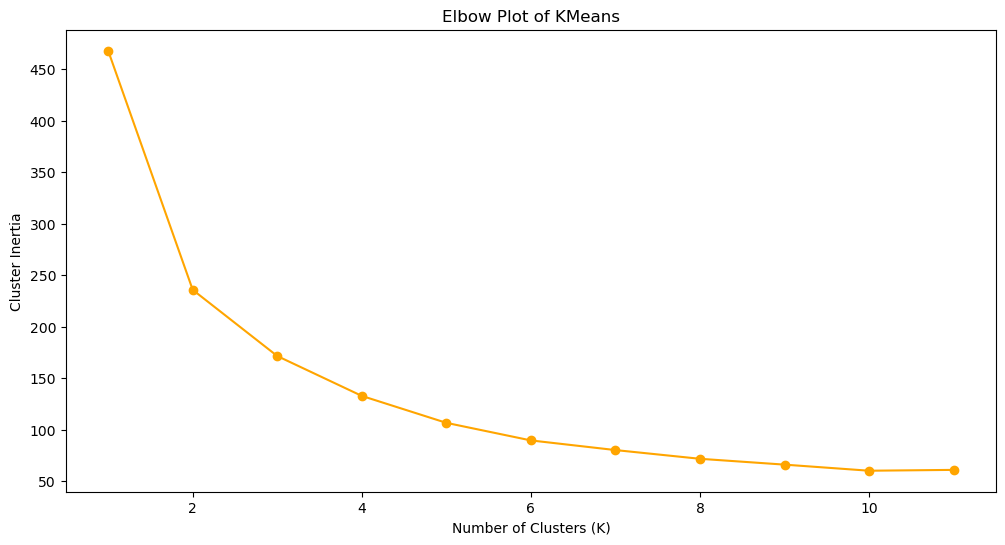

In [179]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

#### Create the final KMeans model

In [181]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [183]:
df3["clusters"] = kmeans_model.labels_

df3.head()

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_3520\596086244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["clusters"] = kmeans_model.labels_


,Score,Healthy life expectancy,Freedom to make life choices,clusters
0,7.769,0.986,0.596,1
1,7.600,0.996,0.592,1
2,7.554,1.028,0.603,1
3,7.494,1.026,0.591,1
4,7.488,0.999,0.557,1


#### Visualize the clusters


Text(0, 0.5, 'Freedom to make life choices')

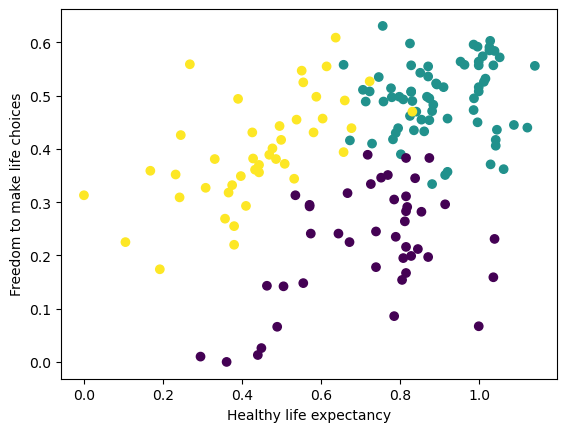

In [185]:
plt.scatter(df3["Healthy life expectancy"], 
            df3["Freedom to make life choices"], 
            c = df3["clusters"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Freedom to make life choices")

## GDP per capita vs Generosity

#### Data Exploration

Text(0, 0.5, 'Generosity')

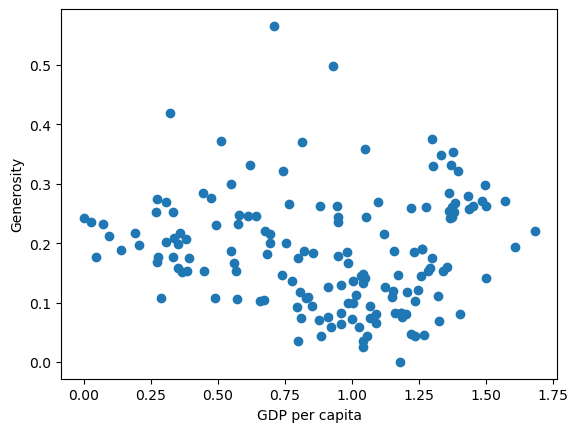

In [51]:

plt.scatter(happy_df["GDP per capita"], 
            happy_df["Generosity"])

plt.xlabel("GDP per capita")
plt.ylabel("Generosity")

#### Choosing Relevant Columns

In [278]:
relevant_cols4 = ["Score","GDP per capita","Generosity"]

df4 = happy_df[relevant_cols4]
df4

,Score,GDP per capita,Generosity
0,7.769,1.340,0.153
1,7.600,1.383,0.252
2,7.554,1.488,0.271
3,7.494,1.380,0.354
4,7.488,1.396,0.322
...,...,...,...
151,3.334,0.359,0.217
152,3.231,0.476,0.276
153,3.203,0.350,0.158
154,3.083,0.026,0.235


#### Data Transformation

- Use the StandardScaler.
- fit() method to calculate the mean and standard deviation of the features.
- transform() method to scale the data.

In [282]:
scaler = StandardScaler()
scaler.fit(df4)
scaled_data = scaler.transform(df4)
scaled_data[0:10]

array([[ 2.12871112,  1.09504166, -0.33540398],
       [ 1.97639663,  1.20332385,  0.70726491],
       [ 1.93493825,  1.46773387,  0.90737308],
       [ 1.8808621 ,  1.19576928,  1.78152982],
       [ 1.87545448,  1.23606033,  1.44450554],
       [ 1.86824433,  1.37707901,  0.82311701],
       [ 1.74477045,  1.21339662,  0.86524504],
       [ 1.71232476,  1.0018686 ,  1.52876161],
       [ 1.68618796,  1.15799642,  1.0548212 ],
       [ 1.65734734,  1.18569652,  0.62300884]])

In [284]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

#### Determine best number of clusters

In [286]:
def find_best_clusters(df4, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df4)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [288]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

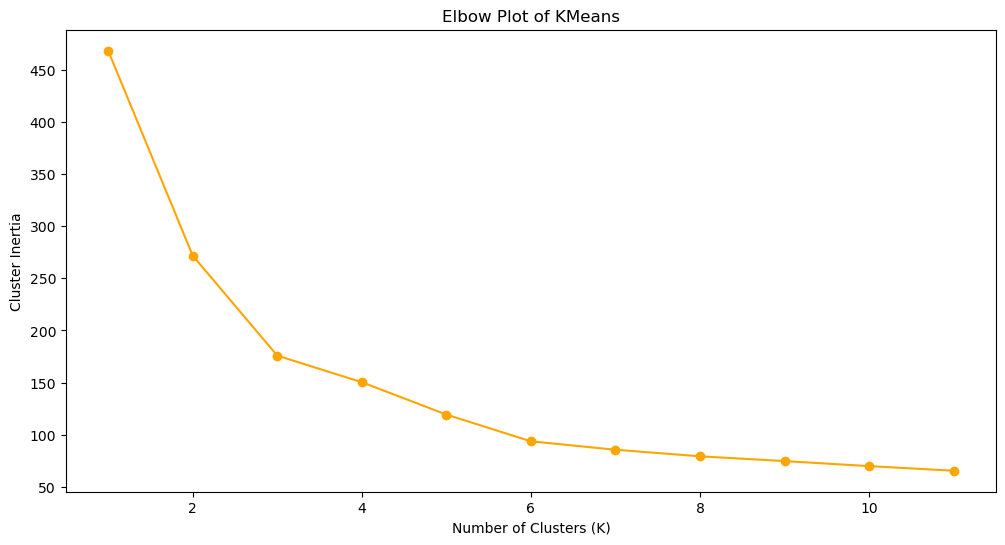

In [290]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

#### Create the final KMeans model

In [292]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [296]:
df4["clusters"] = kmeans_model.labels_

df4.head()

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_3520\4022655698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["clusters"] = kmeans_model.labels_


,Score,GDP per capita,Generosity,clusters
0,7.769,1.340,0.153,0
1,7.600,1.383,0.252,0
2,7.554,1.488,0.271,0
3,7.494,1.380,0.354,0
4,7.488,1.396,0.322,0


#### Visualize the Clusters

Text(0, 0.5, 'Generosity')

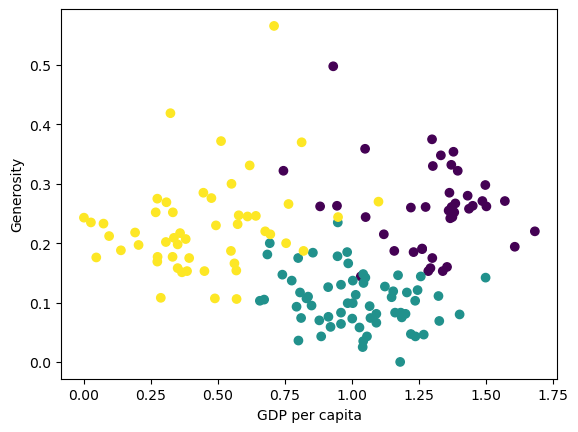

In [302]:
plt.scatter(df4["GDP per capita"], 
            df4["Generosity"], 
            c = df4["clusters"])

plt.xlabel("GDP per capita")
plt.ylabel("Generosity")

## Generosity vs Perceptions of corruption

#### Data Exploration

Text(0, 0.5, 'Perceptions of corruption')

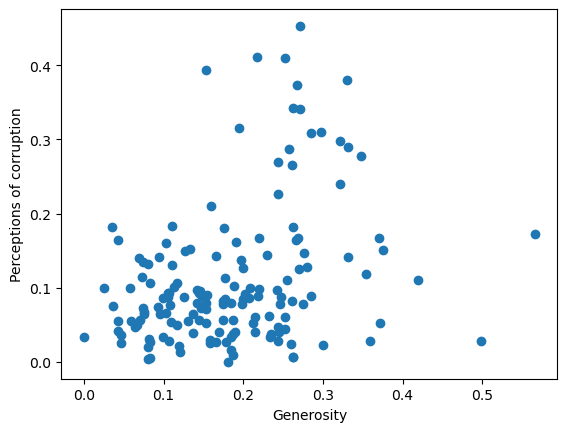

In [355]:
plt.scatter(happy_df["Generosity"], 
            happy_df["Perceptions of corruption"])

plt.xlabel("Generosity")
plt.ylabel("Perceptions of corruption")

#### Choosing Relevant Columns

In [309]:
relevant_cols5 = ["Score","Generosity","Perceptions of corruption"]

df5 = happy_df[relevant_cols5]
df5

,Score,Generosity,Perceptions of corruption
0,7.769,0.153,0.393
1,7.600,0.252,0.410
2,7.554,0.271,0.341
3,7.494,0.354,0.118
4,7.488,0.322,0.298
...,...,...,...
151,3.334,0.217,0.411
152,3.231,0.276,0.147
153,3.203,0.158,0.025
154,3.083,0.235,0.035


#### Data Transformation

- Use the StandardScaler.
- fit() method to calculate the mean and standard deviation of the features.
- transform() method to scale the data.

In [315]:
scaler = StandardScaler()
scaler.fit(df5)
scaled_data = scaler.transform(df5)
scaled_data[0:10]

array([[ 2.12871112, -0.33540398,  2.99675712],
       [ 1.97639663,  0.70726491,  3.17715844],
       [ 1.93493825,  0.90737308,  2.4449413 ],
       [ 1.8808621 ,  1.78152982,  0.07850042],
       [ 1.87545448,  1.44450554,  1.98863208],
       [ 1.86824433,  0.82311701,  2.46616499],
       [ 1.74477045,  0.86524504,  2.78452027],
       [ 1.71232476,  1.52876161,  2.85880316],
       [ 1.68618796,  1.0548212 ,  2.0947505 ],
       [ 1.65734734,  0.62300884,  1.22457942]])

In [317]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

#### Determine the best number of clusters

In [ ]:
def find_best_clusters(df5, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df5)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [319]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

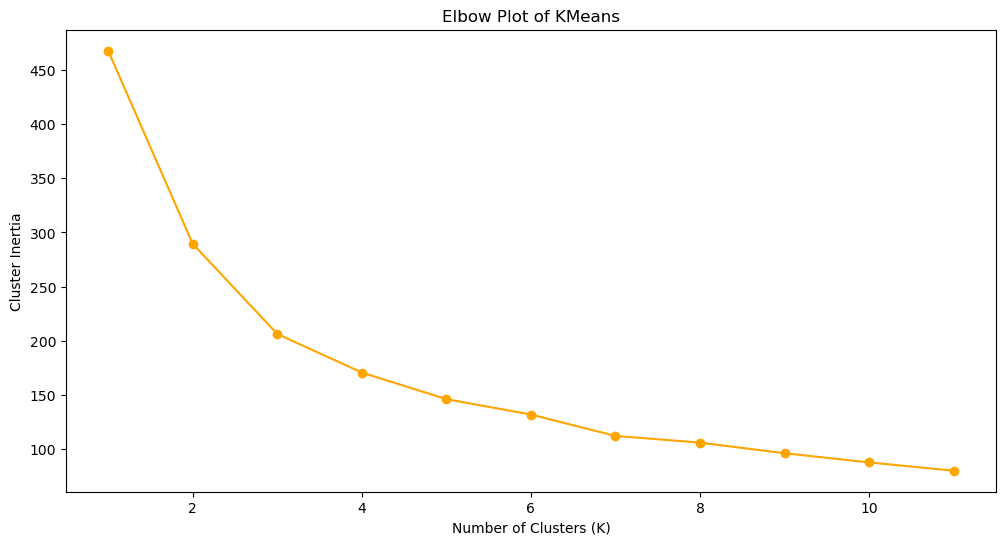

In [321]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

#### Create the final KMeans model

In [347]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

C:\Users\Study-Work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [349]:
df5["clusters"] = kmeans_model.labels_

df5.head()

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_3520\3735172476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["clusters"] = kmeans_model.labels_


,Score,Generosity,Perceptions of corruption,clusters
0,7.769,0.153,0.393,2
1,7.600,0.252,0.410,2
2,7.554,0.271,0.341,2
3,7.494,0.354,0.118,2
4,7.488,0.322,0.298,2


#### Visualize the clusters

Text(0, 0.5, 'Perceptions of corruption')

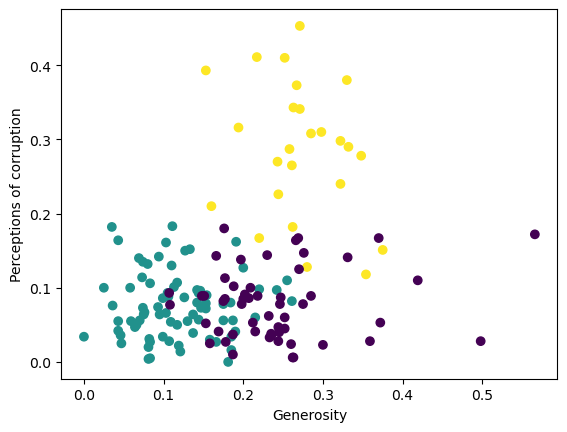

In [353]:
plt.scatter(df5["Generosity"], 
            df5["Perceptions of corruption"], 
            c = df5["clusters"])

plt.xlabel("Generosity")
plt.ylabel("Perceptions of corruption")